In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Banglore Housing Prices - Banglore Housing Prices.csv")

In [ ]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df.dropna(inplace= True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Transform the size cols value to numerical values

In [ ]:
df['size'] = df['size'].astype(str)
df['size'] = [int(value.split(' ')[0]) for value in df['size']]

In [ ]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


# Transform the total_sqft col

In [ ]:
def convert_sqft(value):
    parts = value.split('-')
    if len(parts) == 2:  # Check if the value is a range
        return sum(map(float, parts)) / 2  # Calculate the average of the range
    else:  # If the value is a single number
        try:
            return float(value)  # Convert it to float
        except ValueError:
            return float('nan')  # Return NaN for invalid values


In [ ]:
df['total_sqft']=[convert_sqft(value) for value in df['total_sqft']]

In [ ]:
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [ ]:
df['total_sqft'].isnull().sum()

46

In [ ]:

df.dropna(inplace=True)
df['total_sqft'].isnull().sum()

0

# Calculate and add one more column as ‘Price_Per_Sqft’

In [ ]:
df['Price_per_sqft']=df['price']/df['total_sqft']

In [ ]:
df.head()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500


# Remove the outliers from Price_Per_Sqft and BHK Size column


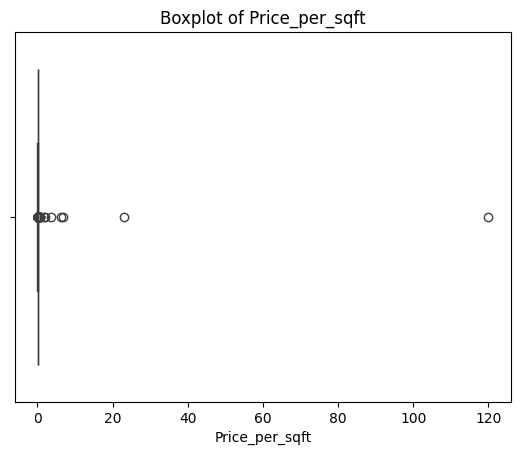

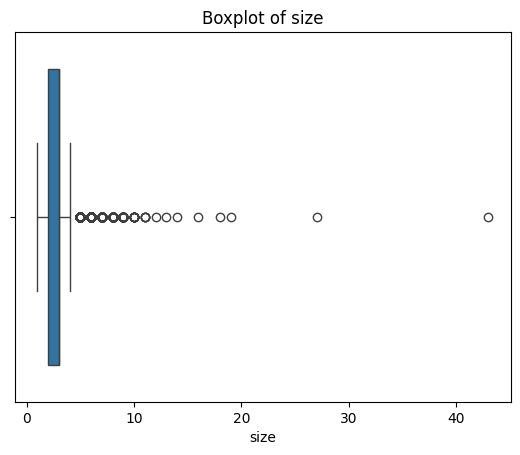

In [ ]:
sns.boxplot(x=df['Price_per_sqft'])
plt.title('Boxplot of Price_per_sqft')
plt.xlabel('Price_per_sqft')
plt.show()

sns.boxplot(x=df['size'])
plt.title('Boxplot of size')
plt.xlabel('size')
plt.show()


In [ ]:
def remove_outliers(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return column[(column >= lower_bound) & (column <= upper_bound)]

In [ ]:
df['Price_per_sqft'] = remove_outliers(df['Price_per_sqft'])

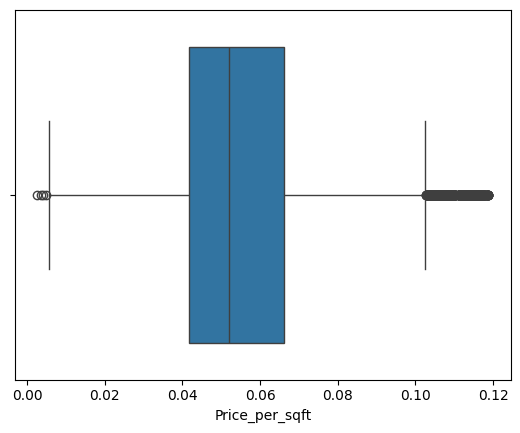

In [ ]:
sns.boxplot(x=df['Price_per_sqft'])
plt.show()

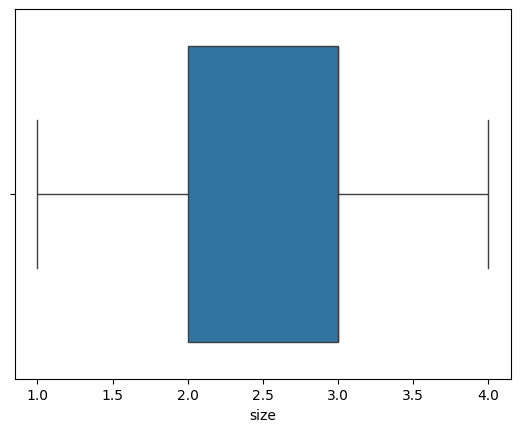

In [ ]:
df['size'] = remove_outliers(df['size'])
sns.boxplot(x=df['size'])
plt.show()

In [ ]:
df.isnull().sum()
df.dropna()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,1715.0,3.0,112.00,0.065306
13316,Richards Town,4.0,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,488.00,0.104073


In [ ]:
X=['location','size','total_sqft','bath','Price_per_sqft']
y=['price']
X

['location', 'size', 'total_sqft', 'bath', 'Price_per_sqft']

In [ ]:
df.isnull().sum()
df.dropna().isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Price_per_sqft    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [5, 1]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

# Evaluating the model using MSE, R-Square and Cross Validation

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
cv = np.mean(cross_val_score(model, X, y, cv=5))

In [ ]:
 print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'Cross Validation Score: {cv}')